# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#OpenWeatherMapKey
api_key = api_keys.api_key

#Endpoint for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

display(api_key)

'ab5c9b31ff53585d7f094b4ad41c7e24'

In [8]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval from WeatherMap API")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}{api_key}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval from WeatherMap API
-------------------------------
Processing Record 1 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=beringovskiy
Processing Record 2 | Beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=beloha
Processing Record 3 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=albany
Processing Record 4 | Aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=aswan
Processing Record 5 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=hithadhoo
Processing Record 6 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bethel
City not found. Skipping...
Processing Record 7 | Boden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=boden
Processing Record 8 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=faanui
City not found. Skipping.

Processing Record 72 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=pisco
Processing Record 73 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=mahebourg
Processing Record 74 | Canalete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=canalete
Processing Record 75 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port-gentil
Processing Record 76 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=sur
Processing Record 77 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=puerto%20ayora
City not found. Skipping...
Processing Record 78 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=yellowknife
Processing Record 79 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bambous%20virieux
Processing Record 80 | Luhyny
http://api.openweather

Processing Record 143 | Kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kampot
Processing Record 144 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=broome
Processing Record 145 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=hay%20river
Processing Record 146 | Ballarat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ballarat
Processing Record 147 | Nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=nurota
Processing Record 148 | Buritis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=buritis
Processing Record 149 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=hilo
Processing Record 150 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=severo-kurilsk
Processing Record 151 | Portsoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q

Processing Record 214 | Visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=visby
Processing Record 215 | Vemalwada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=vemalwada
Processing Record 216 | Tokmak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tokmak
Processing Record 217 | Iralaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=iralaya
Processing Record 218 | Jinxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=jinxiang
City not found. Skipping...
Processing Record 219 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=inirida
Processing Record 220 | Tangshan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tangshan
Processing Record 221 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=provideniya
Processing Record 222 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5

City not found. Skipping...
Processing Record 284 | Mulege
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=mulege
Processing Record 285 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=chapais
Processing Record 286 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=fairbanks
Processing Record 287 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=moerai
Processing Record 288 | Karla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=karla
Processing Record 289 | Shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=shache
Processing Record 290 | San Isidro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=san%20isidro
City not found. Skipping...
Processing Record 291 | Luoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=luoyang
Processing Record 292 | Port Macquarie
http://api.open

Processing Record 354 | Ondjiva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ondjiva
City not found. Skipping...
Processing Record 355 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=prince%20rupert
Processing Record 356 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=guerrero%20negro
Processing Record 357 | Serenje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=serenje
Processing Record 358 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=namibe
Processing Record 359 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=touros
Processing Record 360 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=denpasar
Processing Record 361 | Mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=mitu
Processing Record 362 | Burscheid
http://api.openweathermap.or

Processing Record 425 | Andilamena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=andilamena
Processing Record 426 | Banska Bystrica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=banska%20bystrica
Processing Record 427 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=labuhan
City not found. Skipping...
City not found. Skipping...
Processing Record 428 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=los%20llanos%20de%20aridane
City not found. Skipping...
Processing Record 429 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=nouadhibou
Processing Record 430 | Laramie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=laramie
Processing Record 431 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ahipara
City not found. Skipping...
City not found. Skipping...
City not found. Ski

Processing Record 490 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=chernyshevskiy
City not found. Skipping...
Processing Record 491 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=san%20patricio
Processing Record 492 | Garissa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=garissa
Processing Record 493 | Oppdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=oppdal
Processing Record 494 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=rocha
Processing Record 495 | Jerome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=jerome
City not found. Skipping...
Processing Record 496 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=quatre%20cocos
Processing Record 497 | Manoel Urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=manoel%20urbano
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weatherpy_dict)

# Display count
weather_data.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [10]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
# sort by humidity and delete first two entries

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beringovskiy,2,RU,1561219988,75,63.05,179.32,54.46,1.43
1,Beloha,58,MG,1561219988,66,-25.17,45.06,71.56,11.88
2,Albany,75,US,1561219988,47,42.65,-73.75,77.00,17.22
3,Aswan,0,EG,1561219989,8,24.09,32.90,104.00,9.17
4,Hithadhoo,100,MV,1561219989,71,-0.60,73.08,84.34,7.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

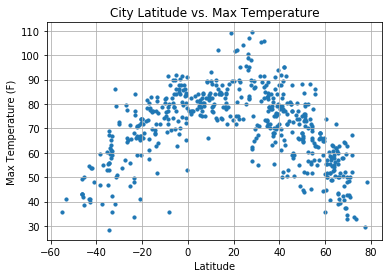

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

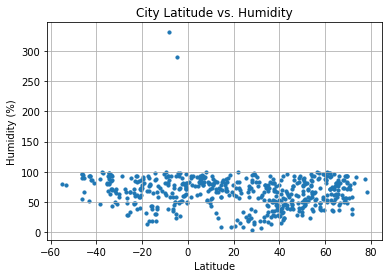

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

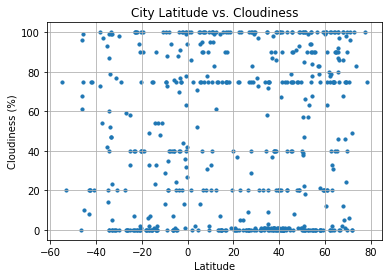

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

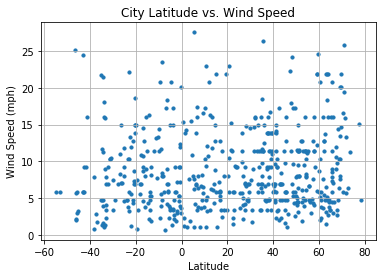

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeed_v_Latitude.png")
plt.show()